<a href="https://colab.research.google.com/github/RomanaNourin/ML_Project/blob/main/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Loading the data**

In [26]:
PCOS_inf = pd.read_csv("/content/drive/MyDrive/Dataset(Cybersec)/PCOS_infertility.csv")
PCOS_data = pd.read_csv("/content/drive/MyDrive/Dataset(Cybersec)/data without infertility _final.csv")

After loading the data, lets print the data to have a look at the data. Remember, We are not looking at the features in the data. We are just making sure that all the data has been loaded correctly

In [27]:
PCOS_data.head().T

,0,1,2,3,4
Sl. No,1,2,3,4,5
Patient File No.,10001,10002,10003,10004,10005
PCOS (Y/N),0,0,1,0,0
Age (yrs),28,36,33,37,25
Weight (Kg),44.6,65.0,68.8,65.0,52.0
Height(Cm),152.0,161.5,165.0,148.0,161.0
BMI,19.3,24.921163,25.270891,29.674945,20.060954
Blood Group,15,15,11,13,11
Pulse rate(bpm),78,74,72,72,72
RR (breaths/min),22,20,18,20,18


Looks like the is some discrepancy in the data. We can see the last row (as transpose of the head is displayed) has Unnamed:42. Lets Check the data if we can correct it

In [28]:
PCOS_data[~ PCOS_data['Unnamed: 42'].isna()].T

,180,363
Sl. No,181,364
Patient File No.,10181,10364
PCOS (Y/N),1,0
Age (yrs),30,31
Weight (Kg),70.0,48.0
Height(Cm),150.0,152.0
BMI,31.111111,20.8
Blood Group,16,17
Pulse rate(bpm),74,72
RR (breaths/min),18,18


We have extracted the two observations in the Unnamed: 42 column. Looks like there was some mistake with entering the data. Lets look at the other columns to check if there are other mistake as well.

In [29]:
PCOS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3    Age (yrs)             541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

We can see there is 1 null value in Marraige Status (Yrs)



In [30]:
PCOS_data[PCOS_data['Marraige Status (Yrs)'].isnull()].T

,458
Sl. No,459
Patient File No.,10459
PCOS (Y/N),1
Age (yrs),36
Weight (Kg),66.0
Height(Cm),162.0
BMI,25.1
Blood Group,15
Pulse rate(bpm),72
RR (breaths/min),20


In [31]:
#lets assign the median to the missing data
PCOS_data['Marraige Status (Yrs)'].fillna(PCOS_data['Marraige Status (Yrs)'].median(),inplace=True)

In [32]:
PCOS_data['Fast food (Y/N)'].fillna(PCOS_data['Fast food (Y/N)'].median(),inplace=True)

Looks like we can just drop the last erroneous column and go ahead with the analysis



**Dropping the column Unnamed: 42**

In [33]:
PCOS_data.drop('Unnamed: 42',axis=1,inplace=True)

In [34]:
PCOS_inf.head()


,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [35]:
PCOS_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


# **Merging the two dataframes**

In [45]:
data = pd.merge(PCOS_data,PCOS_inf, on='Patient File No.',suffixes=('','_y') ,how='left')


In [46]:
data.columns = ['SNo', 'Patient_File_No.', 'PCOS_(Y/N)', 'Age_(yrs)', 'Weight_(Kg)',
       'Height(Cm)', 'BMI', 'Blood_Group', 'Pulse_rate(bpm)',
       'RR_(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle_length(days)',
       'Marriage_Status_(Yrs)', 'Pregnant(Y/N)', 'No_of_aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip_Ratio', 'TSH_(mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit_D3_(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight_gain(Y/N)',
       'hair_growth(Y/N)', 'Skin_darkening (Y/N)', 'Hair_loss(Y/N)',
       'Pimples(Y/N)', 'Fast_food_(Y/N)', 'Reg_Exercise(Y/N)',
       'BP_Systolic(mmHg)', 'BP_Diastolic(mmHg)', 'Follicle_No.(L)',
       'Follicle_No.(R)', 'Avg.Fsize(L)(mm)', 'Avg.Fsize(R)(mm)',
       'Endometrium(mm)', 'Sl.No_y', 'PCOS(Y/N)_y',
       'I_beta-HCG(mIU/mL)', 'II_beta-HCG(mIU/mL)', 'AMH(ng/mL)_y']

In [47]:
data.drop(['Sl.No_y', 'PCOS(Y/N)_y','AMH(ng/mL)_y'],axis=1,inplace=True)


In [48]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SNo                    541 non-null    int64  
 1   Patient_File_No.       541 non-null    int64  
 2   PCOS_(Y/N)             541 non-null    int64  
 3   Age_(yrs)              541 non-null    int64  
 4   Weight_(Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood_Group            541 non-null    int64  
 8   Pulse_rate(bpm)        541 non-null    int64  
 9   RR_(breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle_length(days)     541 non-null    int64  
 13  Marriage_Status_(Yrs)  541 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No_of_

In [49]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
SNo,541.0,271.000000,156.317519,1.000000,136.000000,271.000000,406.000000,541.000000
Patient_File_No.,541.0,10271.000000,156.317519,10001.000000,10136.000000,10271.000000,10406.000000,10541.000000
PCOS_(Y/N),541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
Age_(yrs),541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight_(Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Blood_Group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse_rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR_(breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000


We have successfully loaded the data.



# **Fitting a Model**

Before fitting the model, we will have to split our data into train, valid and test sets. We can use sklearn's train_test_split function to split our data



In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
target = data['PCOS_(Y/N)']
data.drop('PCOS_(Y/N)',axis=1,inplace=True)

In [72]:
type(target)

pandas.core.series.Series

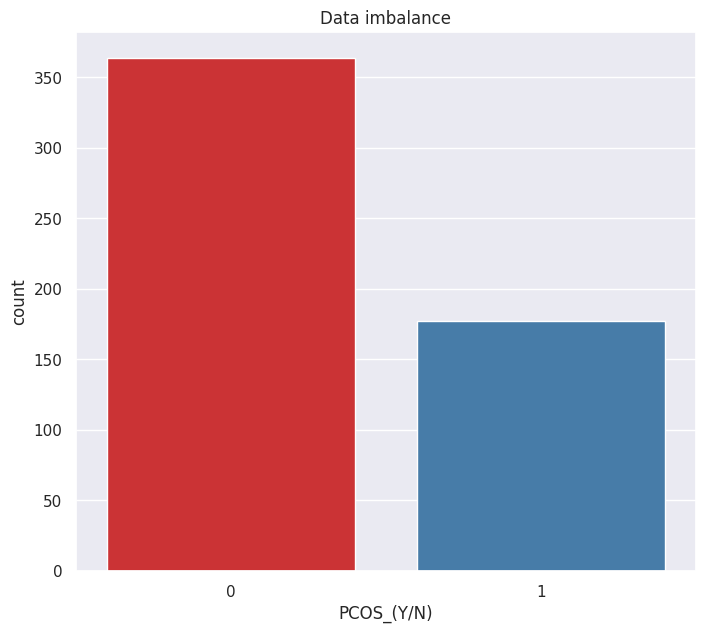

In [79]:
plt.figure(figsize=(8,7))
sns.countplot(x=target, palette = "Set1")
plt.title('Data imbalance')
plt.show()

In [80]:
X_train,X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=1, stratify = target)
X_train,X_valid, y_train, y_valid =  train_test_split(X_train, y_train, test_size=0.3, random_state=1, stratify=y_train
                                                      )

In [81]:
from sklearn.metrics import roc_auc_score
def print_scores(m):
    res = [roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),roc_auc_score(y_valid,m.predict_proba(X_valid)[:,1])]
    for r in res:
        print(r)

In [82]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10)
rf.fit(X_train,y_train)
print_scores(rf)

0.9854938271604938
0.9744324970131422


In [83]:
from sklearn.metrics import roc_curve
y_pred_proba = rf.predict_proba(X_valid)[:,1]
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)

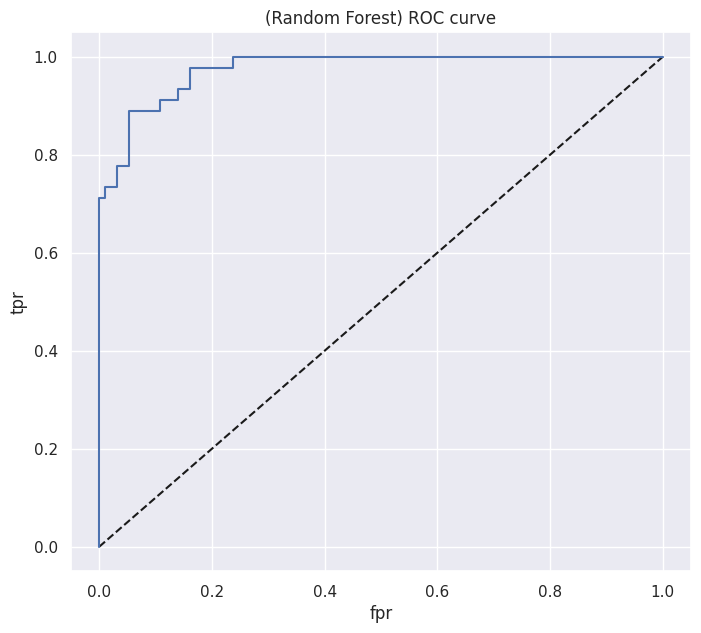

In [88]:
plt.figure(figsize=(8,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('(Random Forest) ROC curve')
plt.show()

Now we are getting a high roc auc score, lets start with out Exploratory Data Analysis

# **Exploratory Data Analysis**

In [85]:
def get_fi(m, df):
    return pd.DataFrame({'col': df.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(rf,X_train)

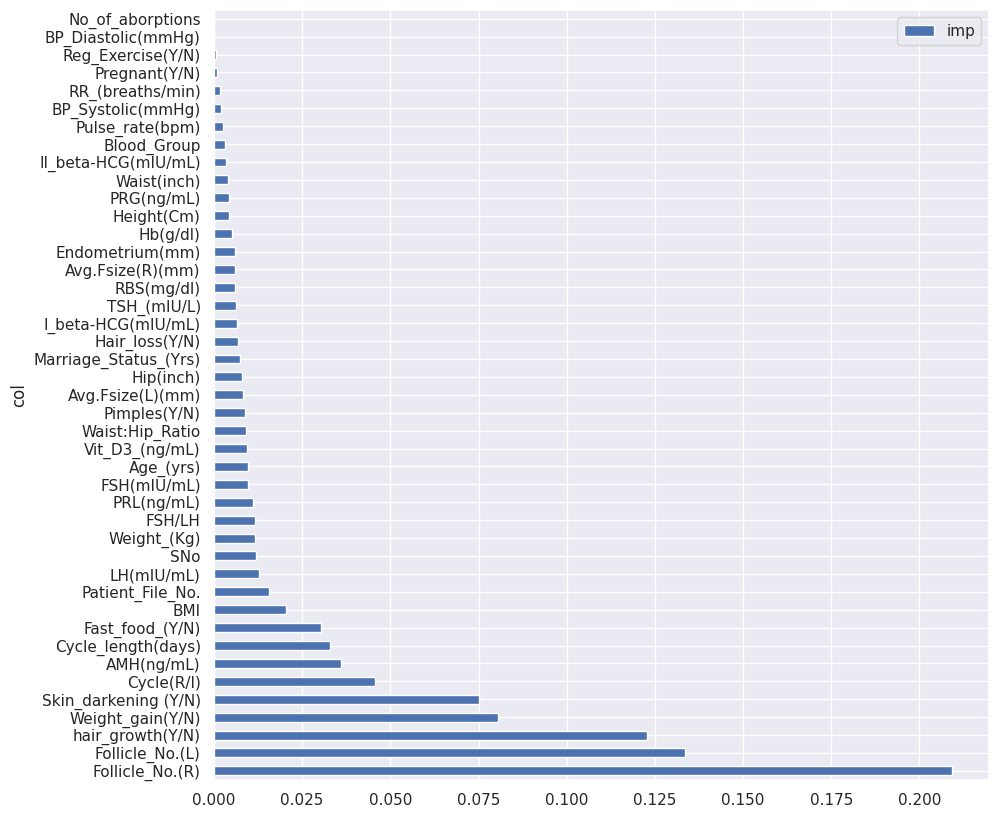

In [86]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(10,10))

plot_fi(fi)

**Observations**


*   We can see that the top features are:
1. Follicle_No.(R)
2. Follicle_No.(L)
3. hair_growth(Y/N)
4. Skin_darkening (Y/N)
5. Weight_gain(Y/N)
6. Fastfood(Y/N)
7. Cycle(R/I)
8. AMH(ng/mL)
9. Cycle_length(days)
10. Pimples(Y/N)



Lets plot data important features and look if we can find some interesting relationships

